Data Science Task

In [1]:
print("importing required libraries")
import pandas as pd
import numpy as np
import ast
import time
import seaborn as sns
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
%matplotlib inline


importing required libraries


In [2]:
df_data=pd.read_csv('/content/raw_furniture_data.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,148,149,150,152,153,154,155,156) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
df_data.shape

(5749, 159)

In [4]:
df_data.head(5)

,product_name,brand_name,product_images,dimensions,dimension_units,weight,weight_units,materials,materials_finish,fabrication_origin,product_type_1,product_type_2,product_type_3,basic_materials_cleaned,currency,retail_price,fabrication_price,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39,...,Unnamed: 119,Unnamed: 120,Unnamed: 121,Unnamed: 122,Unnamed: 123,Unnamed: 124,Unnamed: 125,Unnamed: 126,Unnamed: 127,Unnamed: 128,Unnamed: 129,Unnamed: 130,Unnamed: 131,Unnamed: 132,Unnamed: 133,Unnamed: 134,Unnamed: 135,Unnamed: 136,Unnamed: 137,Unnamed: 138,Unnamed: 139,Unnamed: 140,Unnamed: 141,Unnamed: 142,Unnamed: 143,Unnamed: 144,Unnamed: 145,Unnamed: 146,Unnamed: 147,Unnamed: 148,Unnamed: 149,Unnamed: 150,Unnamed: 151,Unnamed: 152,Unnamed: 153,Unnamed: 154,Unnamed: 155,Unnamed: 156,Unnamed: 157,Unnamed: 158
0,Royce Lounge Chair,SP01,['https://res.cloudinary.com/clippings/image/u...,"{'depth': '76', 'height': '79', 'seat height':...",cm,NaN,NaN,"{'base material': 'Metal', 'seat and back mate...",{'base finish': 'Black Chrome G02B'},NaN,lounge-chairs,seating,furniture,"['metal', 'foam', 'polyurethane']",GBP,1812,1087.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Ruff Small Armchair,Moroso,['https://res.cloudinary.com/clippings/image/u...,"{'depth': '78', 'height': '72', 'seat depth': ...",cm,28,kg,"{'feet material': 'PVC', 'foam material': 'Fla...",{},NaN,armchairs,seating,furniture,"['pvc', 'polyurethane', 'steel']",GBP,1320,792,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Hippo Dining Chair,NORR11,['https://res.cloudinary.com/clippings/image/u...,"{'depth': '59', 'height': '79.5', 'package dep...",cm,6.7,kg,{'backrest material': 'FSC certified solid oak...,{'frame finish': 'Oak Natural'},LV,dining-chairs,seating,furniture,"['oak', 'foam', 'wood', 'plywood']",GBP,583,320.65,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Gab Lounge Chair,Icons Of Denmark,['https://res.cloudinary.com/clippings/image/u...,"{'depth': '65', 'height': '70', 'package depth...",cm,10,kg,"{'frame material': 'Solid oak wood', 'upholste...",{'frame finish': 'Smoked Oiled Oak'},DK,armchairs,seating,furniture,"['wood', 'oak']",GBP,1585,951,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"Violin Dining Chair, Upholstered Seat",GUBI,['https://res.cloudinary.com/clippings/image/u...,"{'back height': '35', 'depth': '54', 'frame de...",cm,5.5,kg,{'backrest material': 'Steam-bent solid walnut...,"{'backrest finish': 'American Walnut Oiled', '...",NaN,dining-chairs,seating,furniture,"['steel', 'foam', 'wood', 'walnut']",EUR,791.64,451.23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Exploratory Data Analysis and data pre-processing

In [5]:
df_data=df_data.iloc[:, 0:17]

In [6]:
df_data.head(3)

,product_name,brand_name,product_images,dimensions,dimension_units,weight,weight_units,materials,materials_finish,fabrication_origin,product_type_1,product_type_2,product_type_3,basic_materials_cleaned,currency,retail_price,fabrication_price
0,Royce Lounge Chair,SP01,['https://res.cloudinary.com/clippings/image/u...,"{'depth': '76', 'height': '79', 'seat height':...",cm,NaN,NaN,"{'base material': 'Metal', 'seat and back mate...",{'base finish': 'Black Chrome G02B'},NaN,lounge-chairs,seating,furniture,"['metal', 'foam', 'polyurethane']",GBP,1812,1087.2
1,Ruff Small Armchair,Moroso,['https://res.cloudinary.com/clippings/image/u...,"{'depth': '78', 'height': '72', 'seat depth': ...",cm,28,kg,"{'feet material': 'PVC', 'foam material': 'Fla...",{},NaN,armchairs,seating,furniture,"['pvc', 'polyurethane', 'steel']",GBP,1320,792
2,Hippo Dining Chair,NORR11,['https://res.cloudinary.com/clippings/image/u...,"{'depth': '59', 'height': '79.5', 'package dep...",cm,6.7,kg,{'backrest material': 'FSC certified solid oak...,{'frame finish': 'Oak Natural'},LV,dining-chairs,seating,furniture,"['oak', 'foam', 'wood', 'plywood']",GBP,583,320.65


In [7]:
df_data.isnull().sum()


product_name                  0
brand_name                    0
product_images                0
dimensions                    1
dimension_units             199
weight                     2083
weight_units               2091
materials                     1
materials_finish              1
fabrication_origin         4558
product_type_1                1
product_type_2                1
product_type_3                1
basic_materials_cleaned       1
currency                      1
retail_price                  1
fabrication_price             1
dtype: int64

In [8]:
df_data = df_data[df_data['dimensions'].notna()]

In [9]:
df_data=df_data[df_data.dimensions.str.startswith(('{'))]

In [10]:
df_data['dimensions'] =  df_data['dimensions'].map(lambda d : ast.literal_eval(d))

In [11]:
df_data = df_data.join(pd.DataFrame(df_data['dimensions'].to_dict()).T)
df_data

,product_name,brand_name,product_images,dimensions,dimension_units,weight,weight_units,materials,materials_finish,fabrication_origin,product_type_1,product_type_2,product_type_3,basic_materials_cleaned,currency,retail_price,fabrication_price,depth,height,seat height,width,seat depth,package depth,package height,package width,back height,frame depth,frame width,legs thickness diameter,seat width,package depth 2,package height 2,package width 2,diameter,frame package depth,frame package height,frame package width,table top package depth,table top package height,table top package width,...,packaging depth box 2,packaging height box 1,packaging height box 2,packaging width box 1,packaging width box 2,package depth for frame,package height for frame,package width for frame,package for legs depth,package for legs height,package for legs width,package for top depth,package for top height,package for top width,pole diameter,bracket depth,bracket height,bracket width,shelf length,pair of trestles package depth,pair of trestles package height,pair of trestles package width,carton for legs depth,carton for legs height,carton for legs width,carton for top depth,carton for top height,carton for top width,carton for frame depth,carton for frame height,carton for frame width,package depth for legs,package height for legs,package width for legs,folding depth,folding height,packaging 2 depth,packaging 2 height,packaging 2 width,base packaging length
0,Royce Lounge Chair,SP01,['https://res.cloudinary.com/clippings/image/u...,"{'depth': '76', 'height': '79', 'seat height':...",cm,NaN,NaN,"{'base material': 'Metal', 'seat and back mate...",{'base finish': 'Black Chrome G02B'},NaN,lounge-chairs,seating,furniture,"['metal', 'foam', 'polyurethane']",GBP,1812,1087.2,76,79,44.5,73.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Ruff Small Armchair,Moroso,['https://res.cloudinary.com/clippings/image/u...,"{'depth': '78', 'height': '72', 'seat depth': ...",cm,28,kg,"{'feet material': 'PVC', 'foam material': 'Fla...",{},NaN,armchairs,seating,furniture,"['pvc', 'polyurethane', 'steel']",GBP,1320,792,78,72,43,89,52,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Hippo Dining Chair,NORR11,['https://res.cloudinary.com/clippings/image/u...,"{'depth': '59', 'height': '79.5', 'package dep...",cm,6.7,kg,{'backrest material': 'FSC certified solid oak...,{'frame finish': 'Oak Natural'},LV,dining-chairs,seating,furniture,"['oak', 'foam', 'wood', 'plywood']",GBP,583,320.65,59,79.5,49,47.5,NaN,64,80,52.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Gab Lounge Chair,Icons Of Denmark,['https://res.cloudinary.com/clippings/image/u...,"{'depth': '65', 'height': '70', 'package depth...",cm,10,kg,"{'frame material': 'Solid oak wood', 'upholste...",{'frame finish': 'Smoked Oiled Oak'},DK,armchairs,seating,furniture,"['wood', 'oak']",GBP,1585,951,65,70,37.5,70,NaN,80,90,80,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"Violin Dining Chair, Upholstered Seat",GUBI,['https://res.cloudinary.com/clippings/image/u...,"{'back height': '35', 'depth': '54', 'frame de...",cm,5.5,kg,{'backrest material': 'Steam-bent solid walnut...,"{'backrest finish': 'American Walnut Oiled', '...",NaN,dining-chairs,seating,furniture,"['steel', 'foam', 'wood', 'walnut'

In [12]:
limitPer = len(df_data) * .30
df_data = df_data.dropna(thresh=limitPer, axis=1)

In [13]:
df_data=df_data[df_data['depth'].fillna("0").str.isnumeric()]

In [14]:
df_data['depth']=df_data['depth'].astype(float)
df_data['depth']=df_data['depth'].replace(0,np.nan)
df_data['depth']=df_data['depth'].interpolate(method ='linear')

In [15]:
df_data=df_data[df_data['height'].fillna("0").str.isnumeric()]
df_data['height']=df_data['height'].astype(float)
df_data['height']=df_data['height'].replace(0,np.nan)
df_data['height']=df_data['height'].interpolate(method ='linear')

In [16]:
df_data=df_data[df_data['seat height'].fillna("0").str.isnumeric()]
df_data['seat height']=df_data['seat height'].astype(float)
df_data['seat height']=df_data['seat height'].replace(0,np.nan)
df_data['seat height']=df_data['seat height'].interpolate(method ='linear')

In [17]:
df_data=df_data[df_data['width'].fillna("0").str.isnumeric()]
df_data['width']=df_data['width'].astype(float)
df_data['width']=df_data['width'].replace(0,np.nan)
df_data['width']=df_data['width'].interpolate(method ='linear')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

In [18]:
df_data=df_data[df_data.materials.str.startswith(('{'))]

In [19]:
df_data['materials'] =  df_data['materials'].map(lambda d : ast.literal_eval(d))

In [20]:
df_data['materials']

1       {'feet material': 'PVC', 'foam material': 'Fla...
4       {'backrest material': 'Steam-bent solid walnut...
5       {'frame material': 'FSC-certified solid oak wi...
6               {'upholstery material': 'Handwoven rope'}
7       {'frame material': 'Powder coated steel', 'mod...
                              ...                        
5743    {'base material': 'Welded Steel', 'stuffing ma...
5744    {'base material': 'Solid Wood', 'stuffing mate...
5745                {'material': 'Solid american walnut'}
5747                                                   {}
5748                    {'material': 'Recycled Aluminum'}
Name: materials, Length: 4339, dtype: object

In [21]:
df_data=pd.concat([df_data.drop(['materials'], axis=1), df_data['materials'].apply(pd.Series)], axis=1)

In [22]:
limitPer1 = len(df_data) * .3
df_data = df_data.dropna(thresh=limitPer1, axis=1)

In [23]:
df_data=df_data[df_data.materials_finish.str.startswith(('{'))]
df_data['materials_finish'] =  df_data['materials_finish'].map(lambda d : ast.literal_eval(d))
df_data=pd.concat([df_data.drop(['materials_finish'], axis=1), df_data['materials_finish'].apply(pd.Series)], axis=1)

In [24]:
limitPer2 = len(df_data) * .23
df_data = df_data.dropna(thresh=limitPer2, axis=1)

In [25]:
del df_data['dimensions']

In [26]:
del df_data['product_images']

In [27]:
df_data['retail_price'] = pd.to_numeric(df_data['retail_price'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [28]:
df_data['fabrication_price'] = pd.to_numeric(df_data['fabrication_price'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [29]:
df_data['weight'] = pd.to_numeric(df_data['weight'],errors='coerce')

In [30]:
df_data['weight']=df_data['weight'].interpolate(method ='linear')

CHI2 test for categorical corrolation

In [31]:
df_chi=df_data[['dimension_units','weight_units','product_type_1','product_type_2','product_type_3','currency']]
df_chi

,dimension_units,weight_units,product_type_1,product_type_2,product_type_3,currency
1,cm,kg,armchairs,seating,furniture,GBP
4,cm,kg,dining-chairs,seating,furniture,EUR
5,cm,kg,coffee-and-side-tables,tables-and-desks,furniture,GBP
6,cm,kg,lounge-chairs,seating,furniture,EUR
7,cm,NaN,sofas,seating,furniture,GBP
...,...,...,...,...,...,...
5743,cm,kg,lounge-chairs,seating,furniture,EUR
5744,cm,kg,lounge-chairs,seating,furniture,EUR
5745,cm,NaN,dining-tables,tables-and-desks,furniture,GBP
5747,NaN,NaN,coffee-and-side-tables,tables-and-desks,furniture,EUR


In [32]:
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x,y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
    rcorr = r-((r-1)**2)/(n-1)
    kcorr = k-((k-1)**2)/(n-1)
    return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))

In [33]:
from scipy.stats import chisquare,chi2_contingency
from tqdm import tqdm

factors_paired = [(i,j) for i in df_chi.columns.values for j in df_chi.columns.values] 

chi2, p_values =[], []

for f in tqdm(factors_paired):
    if f[0] != f[1]:
        chitest = cramers_v(df_chi[f[0]], df_chi[f[1]])   
        chi2.append(chitest)
    else:   
        chi2.append(0)


100%|██████████| 36/36 [00:01<00:00, 30.04it/s]


In [34]:
chi2 = np.array(chi2).reshape((df_chi.shape[-1],df_chi.shape[-1])) # shape it as a matrix
chi2 = pd.DataFrame(chi2, index=df_chi.columns.values, columns=df_chi.columns.values)

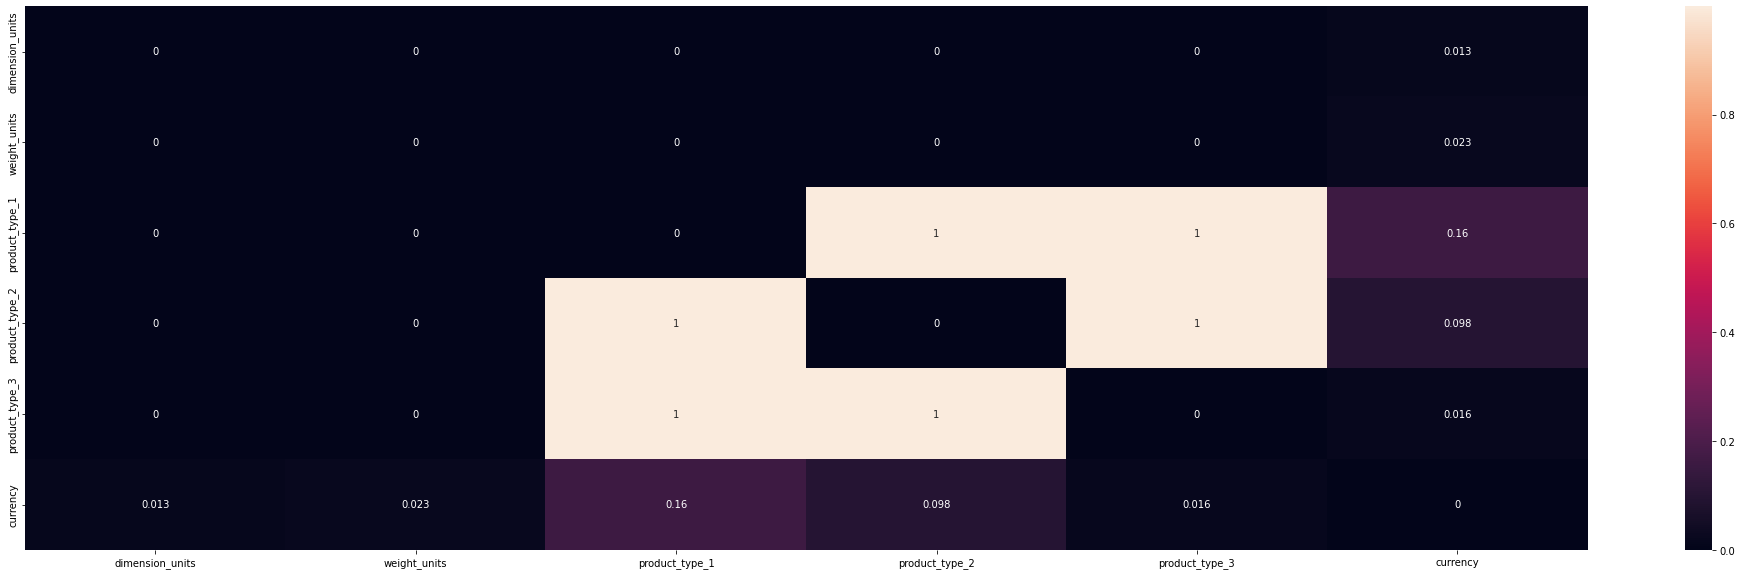

In [35]:
fig, ax = plt.subplots(figsize=(35,10))
sns.heatmap(chi2, annot=True,ax=ax)

In [36]:
df_corr_cat = chi2.unstack().reset_index().rename(columns={0:'correlation_value'})
df_corr_cat["concat"] = df_corr_cat.apply(lambda x: "".join(sorted([x['level_0'],x['level_1']])), axis = 1)
df_corr_cat = df_corr_cat.drop_duplicates("concat")
df_corr_cat.query("correlation_value<0.05 & (level_0!=level_1)")

,level_0,level_1,correlation_value,concat
1,dimension_units,weight_units,0.000000,dimension_unitsweight_units
2,dimension_units,product_type_1,0.000000,dimension_unitsproduct_type_1
3,dimension_units,product_type_2,0.000000,dimension_unitsproduct_type_2
4,dimension_units,product_type_3,0.000000,dimension_unitsproduct_type_3
5,dimension_units,currency,0.012534,currencydimension_units
8,weight_units,product_type_1,0.000000,product_type_1weight_units
9,weight_units,product_type_2,0.000000,product_type_2weight_units
10,weight_units,product_type_3,0.000000,product_type_3weight_units
11,weight_units,currency,0.022784,currencyweight_units
29,product_type_3,currency,0.016429,currencyproduct_type_3


In [37]:
df_data["dimension_units"] = df_data["dimension_units"].astype('category')
df_data["dimension_units"] = df_data["dimension_units"].cat.codes

In [38]:
df_data["weight_units"] = df_data["weight_units"].astype('category')
df_data["weight_units"] = df_data["weight_units"].cat.codes

([0, 1, 2], <a list of 3 Text major ticklabel objects>)

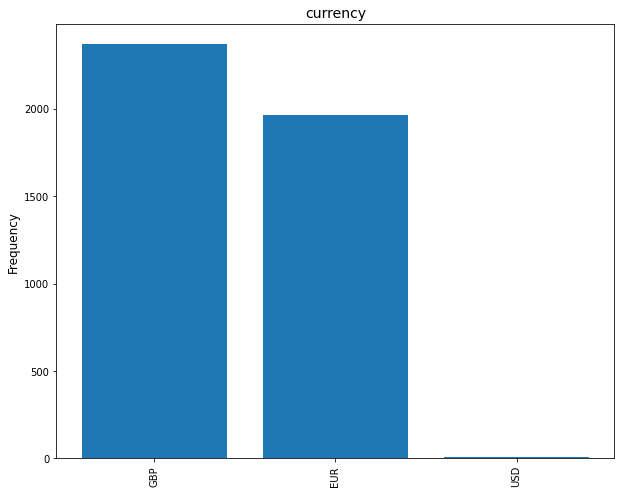

In [39]:
fig, ax = plt.subplots(figsize = (10,8))
ax.bar(df_data["currency"].value_counts().index,
        df_data["currency"].value_counts().values)
ax.set_ylabel("Frequency", size = 12)
ax.set_title("currency", size = 14)
plt.xticks(rotation=90)

In [40]:
df_data["currency"] = df_data["currency"].astype('category')
df_data["currency"] = df_data["currency"].cat.codes

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44],
 <a list of 45 Text major ticklabel objects>)

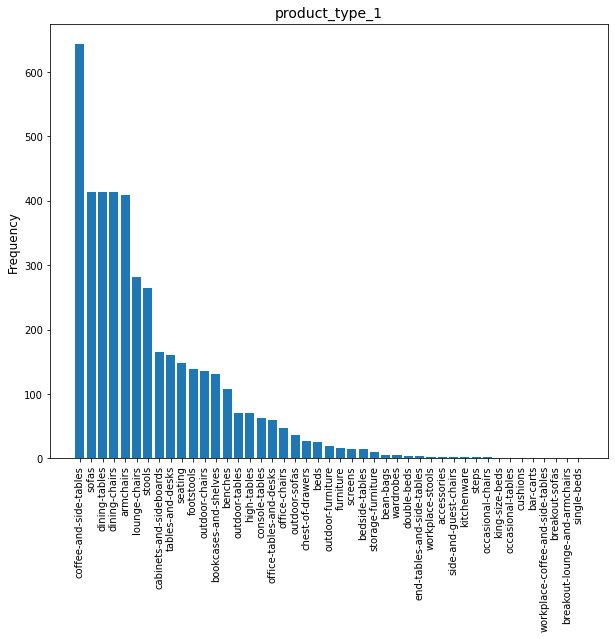

In [41]:
fig, ax = plt.subplots(figsize = (10,8))
ax.bar(df_data["product_type_1"].value_counts().index,
        df_data["product_type_1"].value_counts().values)
ax.set_ylabel("Frequency", size = 12)
ax.set_title("product_type_1", size = 14)
plt.xticks(rotation=90)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
 <a list of 13 Text major ticklabel objects>)

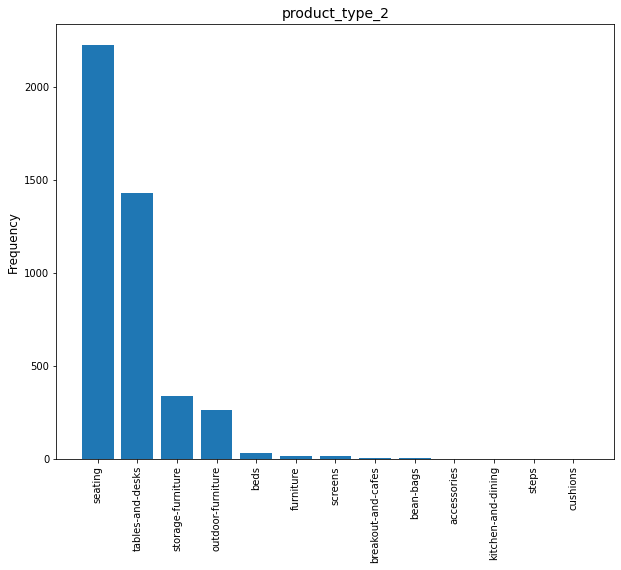

In [42]:
fig, ax = plt.subplots(figsize = (10,8))
ax.bar(df_data["product_type_2"].value_counts().index,
        df_data["product_type_2"].value_counts().values)
ax.set_ylabel("Frequency", size = 12)
ax.set_title("product_type_2", size = 14)
plt.xticks(rotation=90)

([0, 1, 2, 3], <a list of 4 Text major ticklabel objects>)

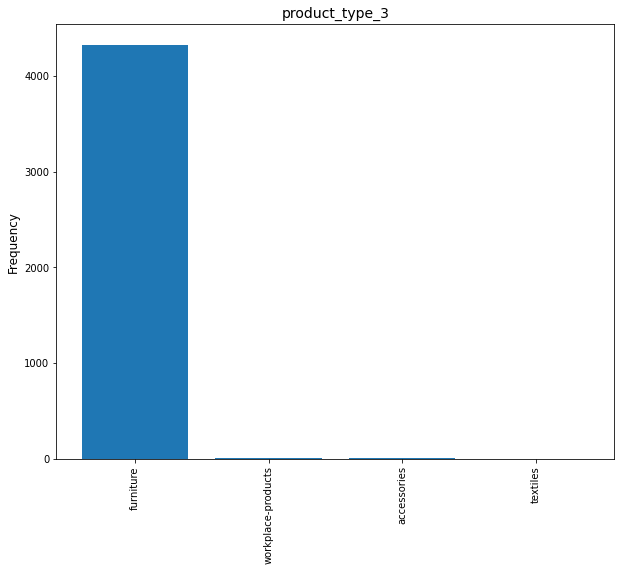

In [43]:
fig, ax = plt.subplots(figsize = (10,8))
ax.bar(df_data["product_type_3"].value_counts().index,
        df_data["product_type_3"].value_counts().values)
ax.set_ylabel("Frequency", size = 12)
ax.set_title("product_type_3", size = 14)
plt.xticks(rotation=90)

In [44]:
df_data["product_type_1"] = df_data["product_type_1"].astype('category')
df_data["product_type_1"] = df_data["product_type_1"].cat.codes
df_data["product_type_2"] = df_data["product_type_2"].astype('category')
df_data["product_type_2"] = df_data["product_type_2"].cat.codes
df_data["product_type_3"] = df_data["product_type_3"].astype('category')
df_data["product_type_3"] = df_data["product_type_3"].cat.codes

In [45]:
df_data.upholstery.value_counts().sort_values(ascending=False).head(25)


A4200 - Geo 01 CS Diamond/Flower Red    87
Main Line Flax Newbury                  75
Sable 1640                              66
Bakul 01                                49
Divina 3 106                            48
Go Atlantic                             42
Aspect ACT01 Atacama                    37
Cairo - Bianco 01                       36
Remix 2 113                             34
Linara 2494/196 Grey Seal               32
Abaco C471 Bianco                       30
Nabuk 2115                              27
Phill 600                               20
A4301 - Stamskin Top 4340-07478         19
57004-0000 Lido-Indigo                  19
Fiord 101                               17
100% polyester                          13
A0867 - Divina 3 623 red                13
Skai Parotega NF amethyst F6461664      12
Remix 2 123                             12
Galaxy 108                              11
Rivoli 2280                             11
Main Line Flax Aldgate MLF01            11
Maia_Avorio

In [46]:
top_25 = [x for x in df_data.finish.value_counts().sort_values(ascending=False).head(25).index]


In [47]:
df_data.loc[~df_data.finish.isin(top_25), 'finish'] = 'others'


In [48]:
df_data['finish'] = df_data['finish'].astype('category')
df_data['finish'] = df_data['finish'].cat.codes

In [49]:
top_25_up = [x for x in df_data.upholstery.value_counts().sort_values(ascending=False).head(25).index]
df_data.loc[~df_data.upholstery.isin(top_25_up), 'upholstery'] = 'others'


In [50]:
df_data['upholstery'] = df_data['upholstery'].astype('category')
df_data['upholstery'] = df_data['upholstery'].cat.codes

In [51]:
top_45_brand = [x for x in df_data.brand_name.value_counts().sort_values(ascending=False).head(45).index]
df_data.loc[~df_data.brand_name.isin(top_45_brand), 'brand_name'] = 'others'
df_data['brand_name'] = df_data['brand_name'].astype('category')
df_data['brand_name'] = df_data['brand_name'].cat.codes

In [52]:
df_data.head(2)

,product_name,brand_name,dimension_units,weight,weight_units,product_type_1,product_type_2,product_type_3,basic_materials_cleaned,currency,retail_price,fabrication_price,depth,height,seat height,width,upholstery,finish
1,Ruff Small Armchair,26,0,28.0,1,1,9,1,"['pvc', 'polyurethane', 'steel']",1,1320.00,792.00,78.0,72.0,43.0,89.0,25,25
4,"Violin Dining Chair, Upholstered Seat",17,0,5.5,1,15,9,1,"['steel', 'foam', 'wood', 'walnut']",0,791.64,451.23,54.0,76.0,45.0,52.0,25,25


In [53]:
df_data["basic_materials_cleaned"] = df_data["basic_materials_cleaned"].apply(eval)

In [54]:
mat_dict = {}
for i in df_data["basic_materials_cleaned"]:
    for j in i:
        if j not in mat_dict:
            mat_dict[j] = 1
        else:
            mat_dict[j] += 1

In [55]:
def to_1D(series):
 return pd.Series([x for _list in series for x in _list])

In [56]:
to_1D(df_data["basic_materials_cleaned"]).value_counts()

steel             1163
wood              1042
oak                493
aluminium          438
foam               437
                  ... 
spruce               1
fibre glass          1
alder                1
silicone balls       1
black ash            1
Length: 85, dtype: int64

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84],
 <a list of 85 Text major ticklabel objects>)

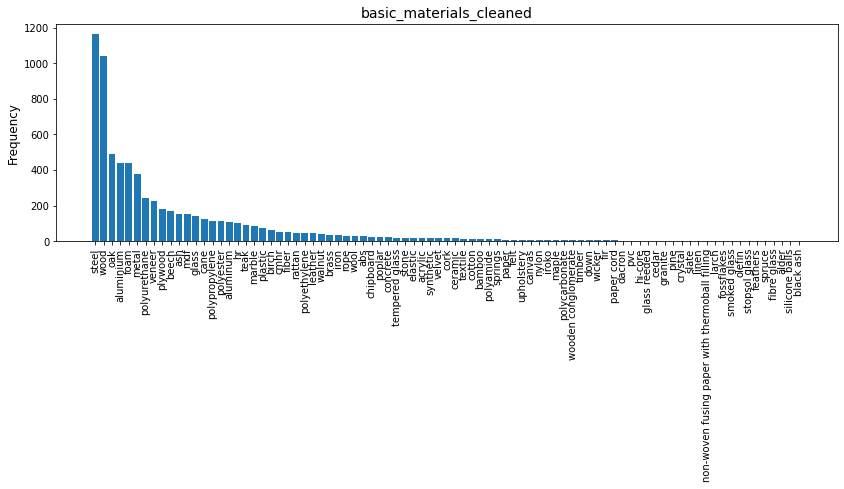

In [57]:
fig, ax = plt.subplots(figsize = (14,4))
ax.bar(to_1D(df_data["basic_materials_cleaned"]).value_counts().index,
        to_1D(df_data["basic_materials_cleaned"]).value_counts().values)
ax.set_ylabel("Frequency", size = 12)
ax.set_title("basic_materials_cleaned", size = 14)
plt.xticks(rotation=90)

In [58]:
basic_mat = df_data["basic_materials_cleaned"].apply(pd.Series)


In [59]:
mats=basic_mat.iloc[:,0].value_counts(normalize = True)

In [60]:
mats=mats.to_dict()

In [61]:
d=[]
for i in df_data["basic_materials_cleaned"]:
    s=0
    for j in i:
      if j in mats:
        s+=mats[j]
    if s!=0:
      s=s/len(i)
    d.append(s)



In [62]:
df_data['basic_materials_cleaned_val'] = d

In [63]:
del df_data['basic_materials_cleaned']

In [64]:
del df_data['product_name']

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


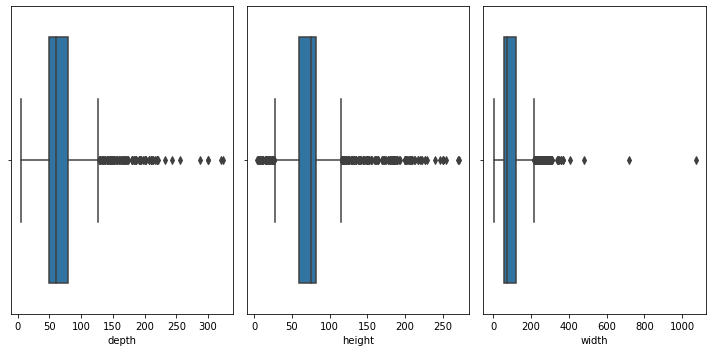

In [65]:
from matplotlib import pyplot as plot
def detectOutliers():
    fig, axs = plot.subplots(1,3, figsize = (10,5))
    plt1 = sns.boxplot(df_data['depth'], ax = axs[0])
    plt2 = sns.boxplot(df_data['height'], ax = axs[1])
    plt3 = sns.boxplot(df_data['width'], ax = axs[2])
    
    plot.tight_layout()
detectOutliers()

In [66]:
df_data.corr()['fabrication_price']

brand_name                    -0.067542
dimension_units                0.008911
weight                         0.358781
weight_units                  -0.209557
product_type_1                 0.087295
product_type_2                 0.020912
product_type_3                -0.007101
currency                       0.025919
retail_price                   0.990405
fabrication_price              1.000000
depth                          0.313897
height                         0.154691
seat height                   -0.088529
width                          0.457540
upholstery                    -0.022472
finish                         0.098319
basic_materials_cleaned_val   -0.082596
Name: fabrication_price, dtype: float64

In [67]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4339 entries, 1 to 5748
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   brand_name                   4339 non-null   int8   
 1   dimension_units              4339 non-null   int8   
 2   weight                       4339 non-null   float64
 3   weight_units                 4339 non-null   int8   
 4   product_type_1               4339 non-null   int8   
 5   product_type_2               4339 non-null   int8   
 6   product_type_3               4339 non-null   int8   
 7   currency                     4339 non-null   int8   
 8   retail_price                 4339 non-null   float64
 9   fabrication_price            4339 non-null   float64
 10  depth                        4339 non-null   float64
 11  height                       4339 non-null   float64
 12  seat height                  4339 non-null   float64
 13  width             

In [68]:
df_data.head(2)

,brand_name,dimension_units,weight,weight_units,product_type_1,product_type_2,product_type_3,currency,retail_price,fabrication_price,depth,height,seat height,width,upholstery,finish,basic_materials_cleaned_val
1,26,0,28.0,1,1,9,1,1,1320.00,792.00,78.0,72.0,43.0,89.0,25,25,0.092187
4,17,0,5.5,1,15,9,1,0,791.64,451.23,54.0,76.0,45.0,52.0,25,25,0.121498


In [69]:
df_data.isnull().sum()

brand_name                     0
dimension_units                0
weight                         0
weight_units                   0
product_type_1                 0
product_type_2                 0
product_type_3                 0
currency                       0
retail_price                   0
fabrication_price              0
depth                          0
height                         0
seat height                    0
width                          0
upholstery                     0
finish                         0
basic_materials_cleaned_val    0
dtype: int64

Picking out Relevant Attributes


In [70]:
correlation = df_data.corr(method='pearson')
columns = correlation.nlargest(15, 'fabrication_price').index
columns

Index(['fabrication_price', 'retail_price', 'width', 'weight', 'depth',
       'height', 'finish', 'product_type_1', 'currency', 'product_type_2',
       'dimension_units', 'product_type_3', 'upholstery', 'brand_name',
       'basic_materials_cleaned_val'],
      dtype='object')

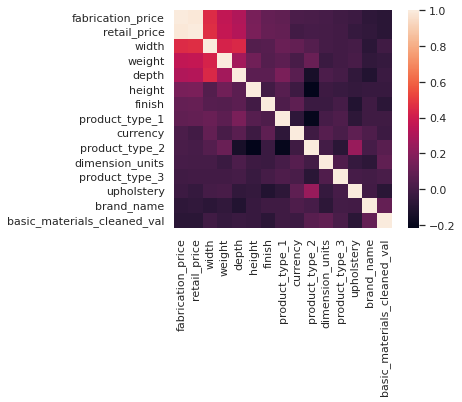

In [71]:
correlation_map = np.corrcoef(df_data[columns].values.T)
sns.set(font_scale=1.0)
heatmap = sns.heatmap(correlation_map, cbar=True,  square=True, fmt='.2f', yticklabels=columns.values, xticklabels=columns.values)

Normalisation

In [72]:
df_data['fabrication_price'] = np.log(df_data['fabrication_price'])
df_data['retail_price'] = np.log(df_data['retail_price'])


Basic Algos

In [73]:
X = df_data[columns]
Y = X['fabrication_price'].values
X = X.drop('fabrication_price', axis = 1).values

In [74]:
X_train, X_test, Y_train, Y_test = train_test_split (X, Y, test_size = 0.20, random_state=42)

Linear Regression

In [75]:
kfold = KFold(n_splits=10)
model1=LinearRegression()
cv_results1 = cross_val_score(model1, X_train, Y_train, cv=kfold, scoring='neg_mean_squared_error')
print(cv_results1.mean(),cv_results1.std())

-0.00682308215423455 0.0006256921337905371


Lasso Regression

In [76]:
kfold = KFold(n_splits=10)
model2=Lasso()
cv_results2 = cross_val_score(model2, X_train, Y_train, cv=kfold, scoring='neg_mean_squared_error')
print(cv_results2.mean(),cv_results2.std())

-0.6275675883850848 0.05725277028540043


KNeighbors Regressor

In [77]:

kfold = KFold(n_splits=10)
model4=KNeighborsRegressor()
cv_results4 = cross_val_score(model4, X_train, Y_train, cv=kfold, scoring='neg_mean_squared_error')
print(cv_results4.mean(),cv_results4.std())

-0.5267381990045522 0.03903156780488167


Decision TreeRegressor

In [78]:
kfold = KFold(n_splits=10)
model5=DecisionTreeRegressor()
cv_results5 = cross_val_score(model5, X_train, Y_train, cv=kfold, scoring='neg_mean_squared_error')
print(cv_results5.mean(),cv_results5.std())

-0.009454335438730204 0.0012100563128483283


Gradient Boosting Regressor

In [79]:
kfold = KFold(n_splits=10)
model6=GradientBoostingRegressor()
cv_results6 = cross_val_score(model6, X_train, Y_train, cv=kfold, scoring='neg_mean_squared_error')
print(cv_results6.mean(),cv_results6.std())

-0.0028927330342139587 0.0003949766566628779


Chosen Model: Gradient Boosting Regressor

In [80]:
final_model=GradientBoostingRegressor()

In [81]:
final_model.fit(X_train,Y_train)

GradientBoostingRegressor()

Predictions

In [82]:
predictions = final_model.predict(X_test)
print(mean_squared_error(Y_test, predictions))

0.002881681834251725


In [83]:
from sklearn.metrics import r2_score
r2_score(Y_test, predictions,multioutput='variance_weighted')

0.9970226376103132

In [84]:
comparisons = pd.DataFrame({'Prediction': predictions, 'Test Data' : Y_test})
comparisons.head(10)

,Prediction,Test Data
0,7.911946,7.905471
1,6.064330,6.090925
2,6.258377,6.289437
3,5.819196,5.981515
4,6.780035,6.715383
5,5.683047,5.711751
6,6.118836,6.135565
7,8.579408,8.575934
8,8.020572,8.042314
9,6.875266,6.813445


In [85]:
actual_y_test = np.exp(Y_test)
actual_predicted = np.exp(predictions)
diff = abs(actual_y_test - actual_predicted)
compare_actual = pd.DataFrame({'Test Data': actual_y_test, 'Predicted Price' : actual_predicted, 'Difference' : diff})
compare_actual = compare_actual.astype(int)
compare_actual.head(15)

,Test Data,Predicted Price,Difference
0,2712,2729,17
1,441,430,11
2,538,522,16
3,396,336,59
4,824,880,55
5,302,293,8
6,461,454,7
7,5302,5320,18
8,3109,3042,66
9,909,968,58
